#Project Name - Health Insurance Data Analysis

**Project Type - Exploratory Data Analysis (EDA)**

#Project Summary -

- The purpose of this analysis is to understand the factors that influence health insurance charges and claim amounts. The dataset includes key information such as age, gender, BMI, smoking status, annual salary, hospital expenditure, past consultations, and region.


- The project began with data cleaning, where missing values and inconsistencies were handled to ensure reliable analysis. After preparing the data, we performed exploratory data analysis (EDA) to uncover trends and meaningful insights.


- Using visualizations and summaries, we examined how different factors impact insurance costs. The results showed that smoking, higher BMI, and older age are strongly linked to higher charges, while past consultations and hospital expenditures also play a significant role.


- These insights can help insurance companies improve pricing strategies and risk assessment, and they can also be used for predictive modeling to forecast charges for new customers. Additionally, the findings highlight lifestyle factors that individuals can manage to potentially reduce their insurance burden.



#Problem Statement -

Healthcare costs are influenced by many factors such as age, lifestyle choices, medical history, and income levels. For insurance companies, estimating these costs correctly is a major challenge. If the charges are set too high, customers may find policies unaffordable, while setting them too low can lead to financial risks for the provider.

This creates the need to analyze insurance data and identify the key drivers of claim amounts and charges. Understanding the role of factors like smoking status, BMI, hospital visits, and salary can help companies design fair policies and improve risk management. At the same time, individuals can gain awareness of how their lifestyle and health decisions directly impact their insurance costs.

**Importing the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Load Insurance Dataset**

In [ ]:
df = pd.read_csv('/content/insurance 28th Files.csv')

**Dataset First View**

In [ ]:
print(df.to_string())

       age     sex     bmi  children smoker  Claim_Amount  past_consultations  num_of_steps  Hospital_expenditure  NUmber_of_past_hospitalizations  Anual_Salary     region       charges
0     18.0    male  23.210       0.0     no  29087.543130                17.0      715428.0          4.720921e+06                              0.0  5.578497e+07  southeast   1121.873900
1     18.0    male  30.140       0.0     no  39053.674370                 7.0      699157.0          4.329832e+06                              0.0  1.370089e+07  southeast   1131.506600
2     18.0    male  33.330       0.0     no  39023.627590                19.0      702341.0          6.884861e+06                              0.0  7.352311e+07  southeast   1135.940700
3     18.0    male  33.660       0.0     no  28185.393320                11.0      700250.0          4.274774e+06                              0.0  7.581968e+07  southeast   1136.399400
4     18.0    male  34.100       0.0     no  14697.859410             

**Dataset Rows & Columns count**

In [ ]:
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 1338
Number of columns : 13


**Understand the Given Variables**

**age –** Age of the person

**sex –** Gender (male/female)

**bmi –** Body Mass Index

**children –** Number of dependents

**smoker –** Smoking status (yes/no)

**Claim_Amount –** Insurance claim amount

**past_consultations –** Number of consultations before

**num_of_steps –** Physical activity (steps)

**Hospital_expenditure –** Money spent on hospital visits

**NUmber_of_past_hospitalizations –** Past hospitalizations

**Anual_Salary –** Annual salary

**region –** Region (northeast, northwest, southeast, southwest)

**charges –** Final insurance charges

**Dataset Inforamtion**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [ ]:
#Statistics Report
df.describe()

age          bmi     children  Claim_Amount  \
count  1329.000000  1335.000000  1333.000000   1324.000000   
mean     39.310008    30.665112     1.090773  33361.327180   
std      14.034818     6.101690     1.201856  15617.288337   
min      18.000000    15.960000     0.000000   1920.136268   
25%      27.000000    26.302500     0.000000  20768.860390   
50%      39.000000    30.400000     1.000000  33700.310675   
75%      51.000000    34.687500     2.000000  45052.331957   
max      64.000000    53.130000     5.000000  77277.988480   

       past_consultations  num_of_steps  Hospital_expenditure  \
count         1332.000000  1.335000e+03          1.334000e+03   
mean            15.216216  9.100047e+05          1.584179e+07   
std              7.467723  9.188612e+04          2.669305e+07   
min              1.000000  6.954300e+05          2.945253e+04   
25%              9.000000  8.471995e+05          4.077633e+06   
50%             15.000000  9.143000e+05          7.490337e+06   
75%             20.000000  9.716840e+05          1.084082e+07   
max             40.000000  1.107872e+06          2.616317e+08   

       NUmber_of_past_hospitalizations  Anual_Salary       charges  
count                      1336.000000  1.332000e+03   1338.000000  
mean                          1.060629  3.696849e+08  13270.422265  
std                           0.533583  5.668843e+08  12110.011237  
min                           0.000000  2.747072e+06   1121.873900  
25%                           1.000000  7.701932e+07   4740.287150  
50%                           1.000000  1.419361e+08   9382.033000  
75%                           1.000000  3.243499e+08  16639.912515  
max                           3.000000  4.117197e+09  63770.428010

**Data Exploration and Data Cleaning**

In [ ]:
#1. Checking what are the variables here:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [ ]:
#2. Checking shape of Airbnb dataset
df.shape

(1338, 13)

In [ ]:
#3. Check for Duplicate values
df.duplicated().sum()

np.int64(0)

In [ ]:
#4. Check for Null/Missing values
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [ ]:
df.dtypes

age                                float64
sex                                 object
bmi                                float64
children                           float64
smoker                              object
Claim_Amount                       float64
past_consultations                 float64
num_of_steps                       float64
Hospital_expenditure               float64
NUmber_of_past_hospitalizations    float64
Anual_Salary                       float64
region                              object
charges                            float64
dtype: object

In [ ]:
#5. Fill Null/Missing values


null_values = ['age', 'bmi', 'children', 'Claim_Amount']    # Columns with null values

# Fill numeric columns with median
for col in null_values:
    df[col].fillna(df[col].median(), inplace=True)

# Fill categorical columns with mode
df['sex'].fillna(df['sex'].mode()[0], inplace=True)
df['smoker'].fillna(df['smoker'].mode()[0], inplace=True)
df['region'].fillna(df['region'].mode()[0], inplace=True)




*   Since the dataset contained missing values, I first focused on handling them carefully. For the numerical columns such as age, bmi, children, and Claim_Amount, I replaced the missing values with the median, as it is more reliable than the mean when the data is skewed or influenced by outliers. For the categorical columns like sex, smoker, and region, I filled the missing values using the mode (most common value).



In [ ]:
#6. Drop rows with any missing values

df.dropna(inplace=True)


# Drop the specific column

df.drop('NUmber_of_past_hospitalizations', axis=1, inplace=True)




*   The remaining columns with missing values were dropped, as they vary independently and filling them could have reduced the overall quality and accuracy of the dataset.



In [ ]:
df.isna().sum().sum()

np.int64(0)

**Data Vizualization and Removing Outliers**

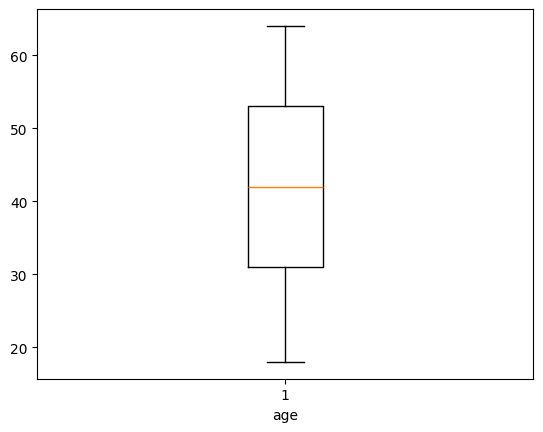

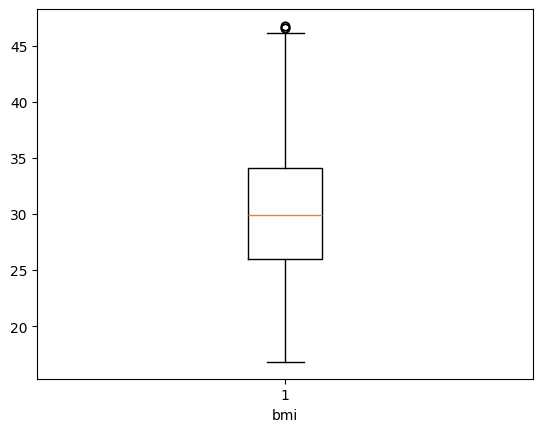

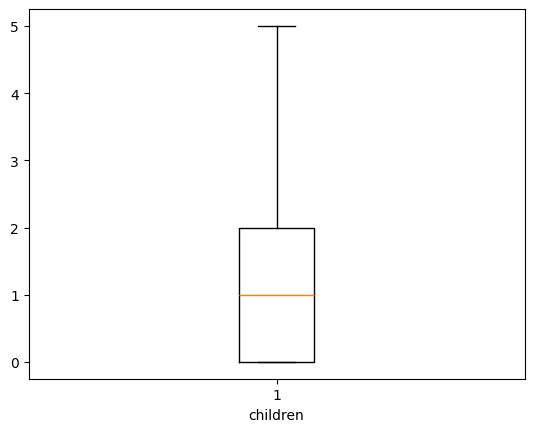

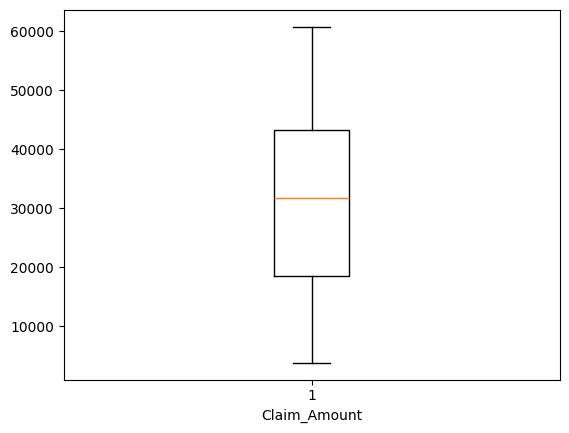

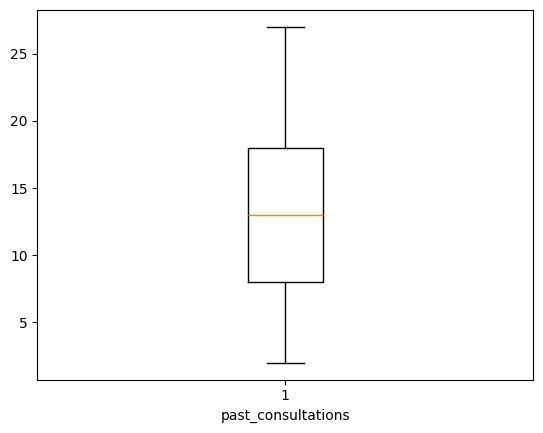

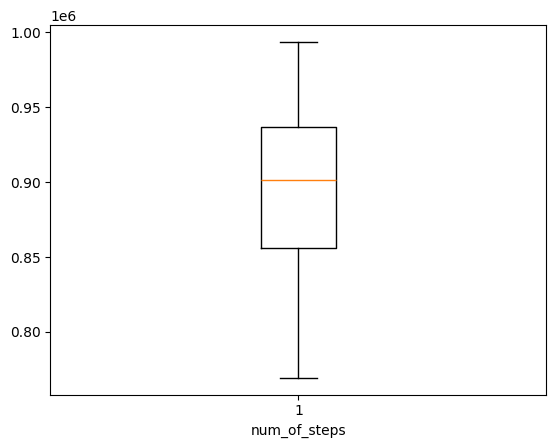

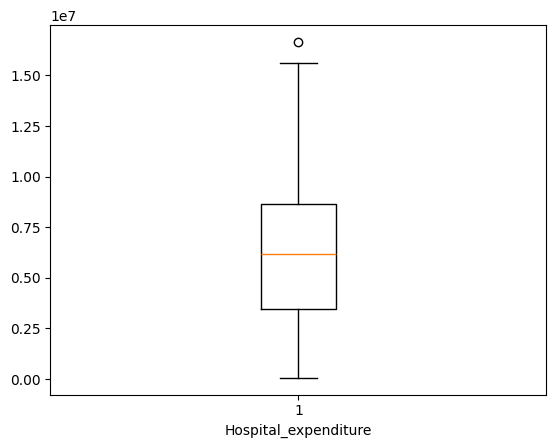

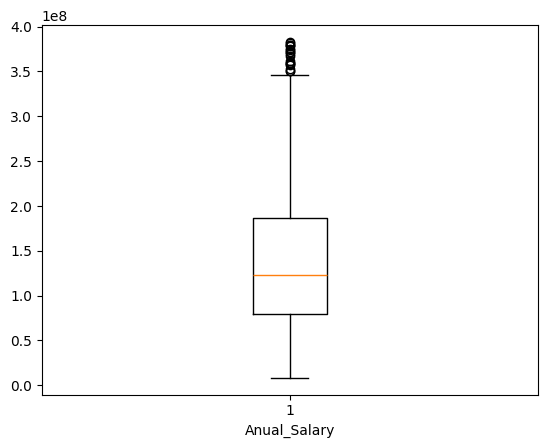

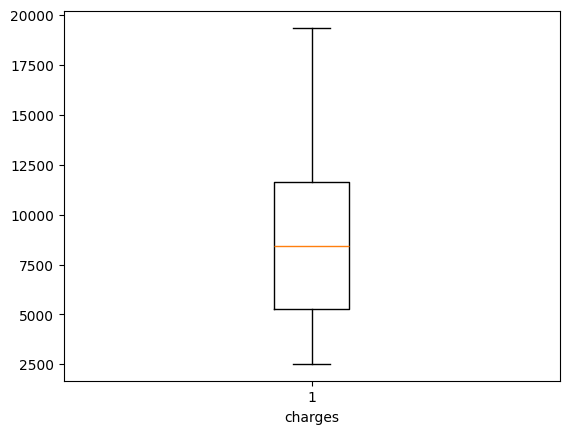

In [ ]:
for i in df.columns:
  if df.dtypes[i] =='int64' or df.dtypes[i] =='float64':

    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()


**Removing Outliers**

In [ ]:
for i in df.columns:
  if df.dtypes[i] in ['int64', 'float64']:

# Step 1: Calculate quartiles and IQR

    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

 # Step 2: Calculate upper and lower fence

    upper_fence = Q3 + 1.5 * IQR
    lower_fence = Q1 - 1.5 * IQR

# Step 3: Filter out outliers (Keep only values within the fences)

    df = df[ (df[i] >= lower_fence) & (df[i] <= upper_fence)]

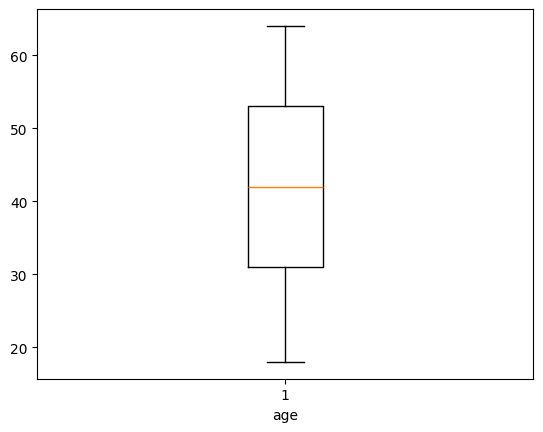

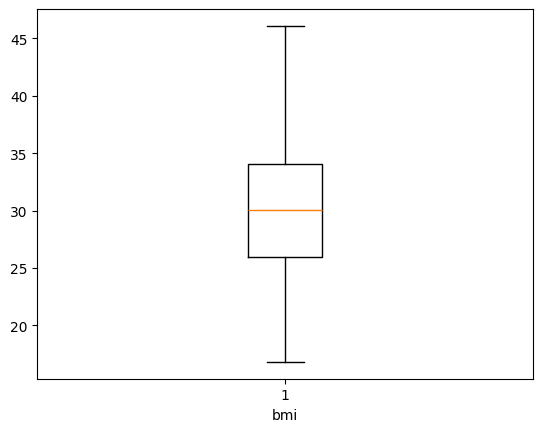

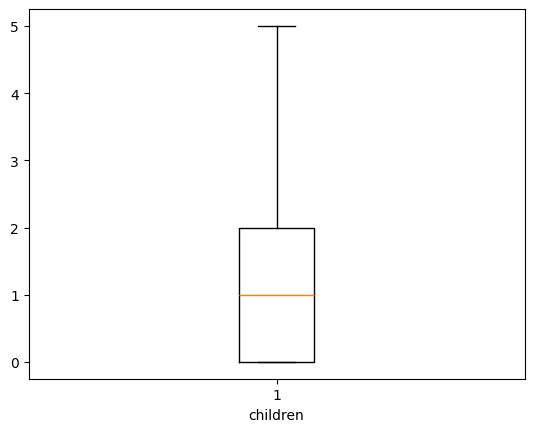

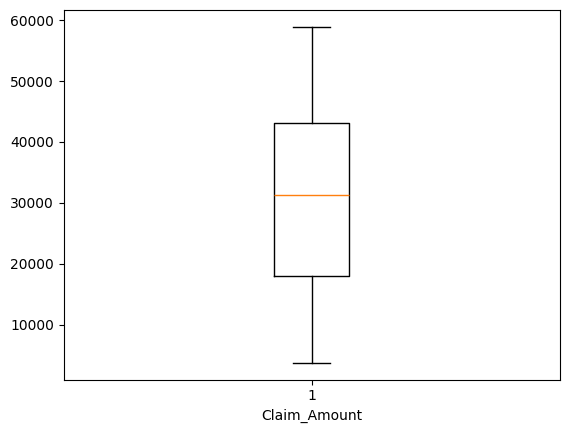

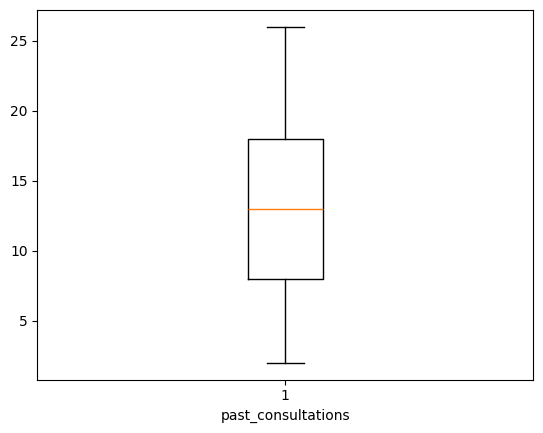

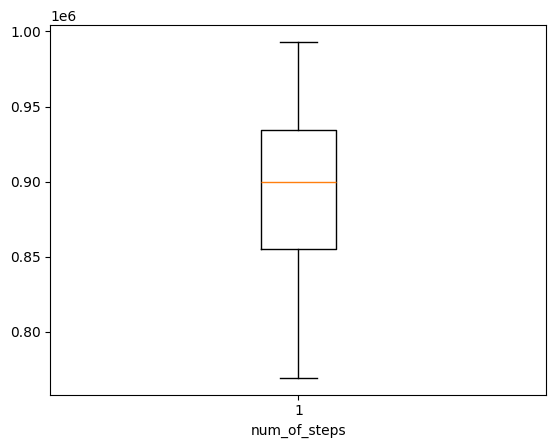

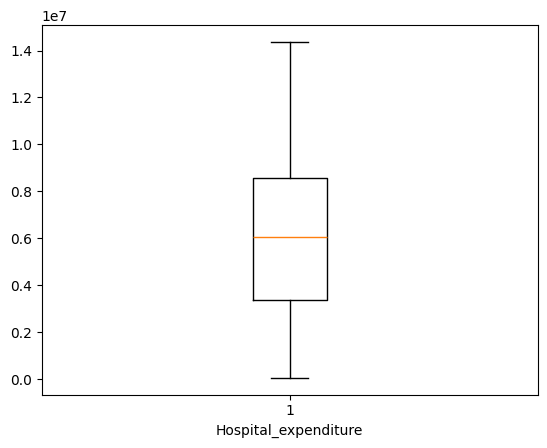

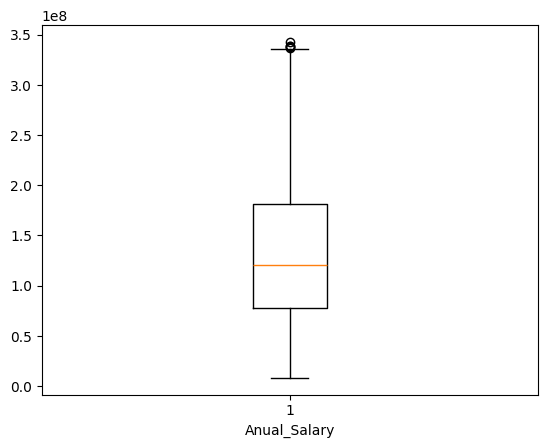

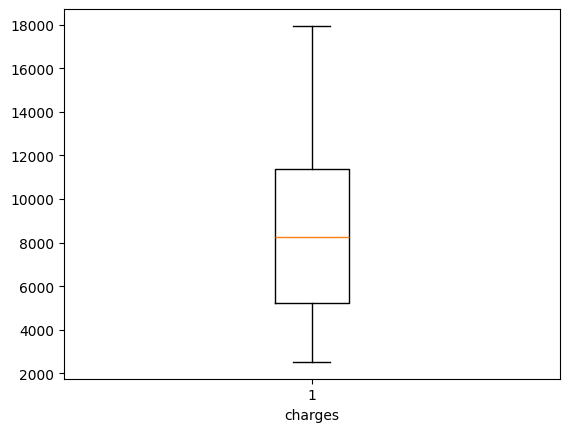

In [ ]:
for i in df.columns:
  if df.dtypes[i] =='int64' or df.dtypes[i] =='float64':

    plt.boxplot(df[i])
    plt.xlabel(i)
    plt.show()

**Understand the relationships between variables**

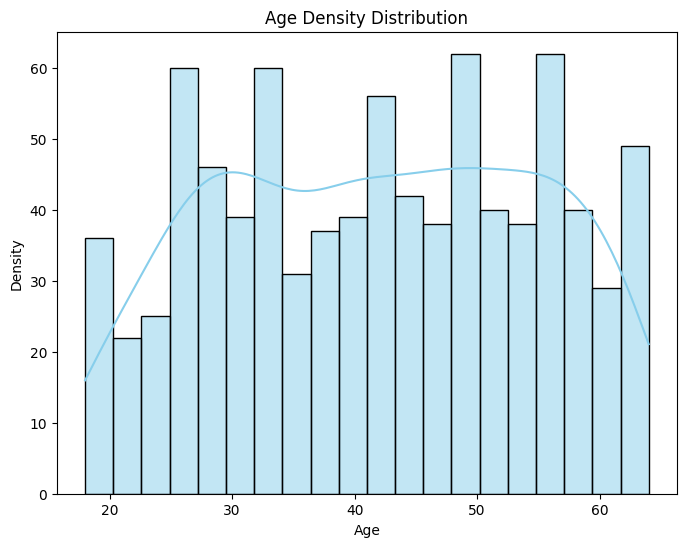

In [ ]:
#1. What is the overall age distribution of insured individuals?

sns.histplot(df['age'], bins=20, kde=True, color="skyblue")
plt.title("Age Density Distribution")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()

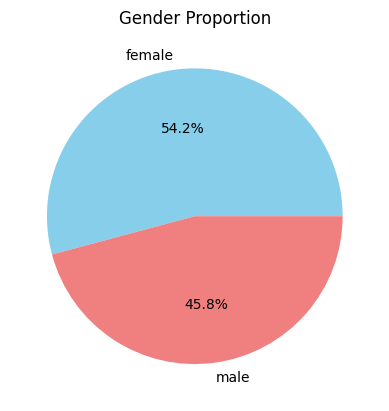

In [ ]:
#2. Find in our data how many male and how many female are there?
df['sex'].value_counts().plot.pie(autopct = '%1.1f%%', colors = ['skyblue', 'lightcoral'], title = 'Gender Proportion', ylabel = '')
plt.show()

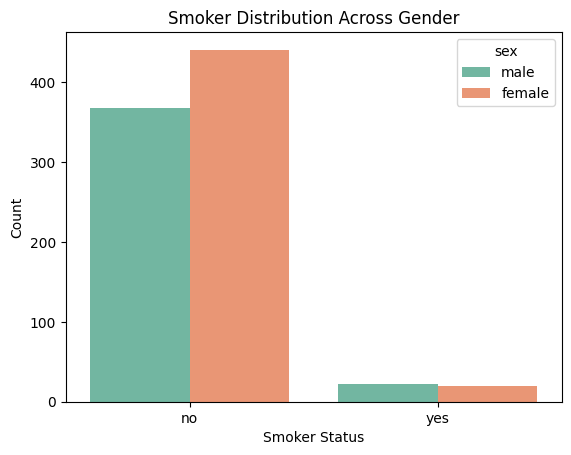

In [ ]:
#3. How does smoker distribution vary across gender?

sns.countplot(x = 'smoker', hue = 'sex', data = df, palette="Set2")

plt.title("Smoker Distribution Across Gender")
plt.xlabel("Smoker Status")
plt.ylabel("Count")
plt.show()

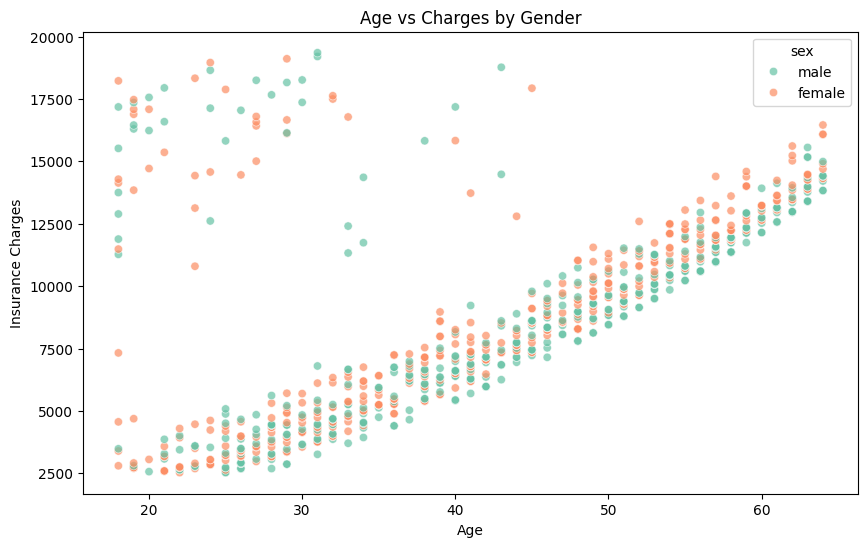

In [ ]:
#4. What is the relationship between age and insurance charges, and how does it differ by gender?

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="age", y="charges", hue="sex", alpha=0.7, palette="Set2")
plt.title("Age vs Charges by Gender")
plt.xlabel("Age")
plt.ylabel("Insurance Charges")
plt.show()

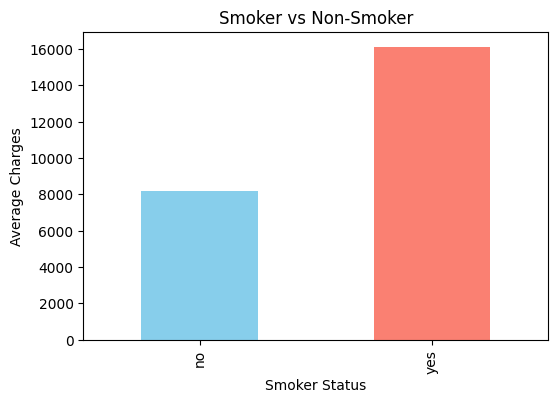

In [ ]:
#5 How do insurance charges vary between smokers and non-smokers?
avg_charges = df.groupby('smoker')['charges'].mean()

avg_charges.plot(kind='bar', color=['skyblue', 'salmon'], figsize=(6,4))

plt.title("Smoker vs Non-Smoker")
plt.ylabel("Average Charges")
plt.xlabel("Smoker Status")
plt.show()

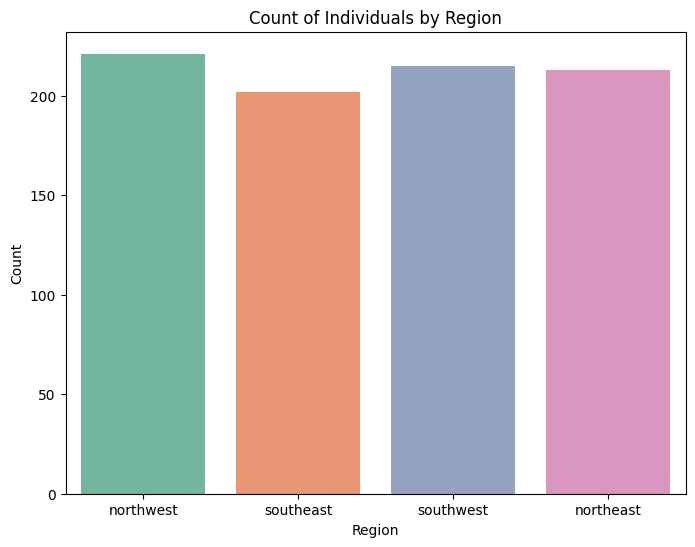

In [ ]:
#6. Which region has the highest/lowest number of insured individuals?

plt.figure(figsize=(8,6))
sns.countplot(x='region', data=df, palette="Set2")
plt.title("Count of Individuals by Region")
plt.xlabel("Region")
plt.ylabel("Count")
plt.show()

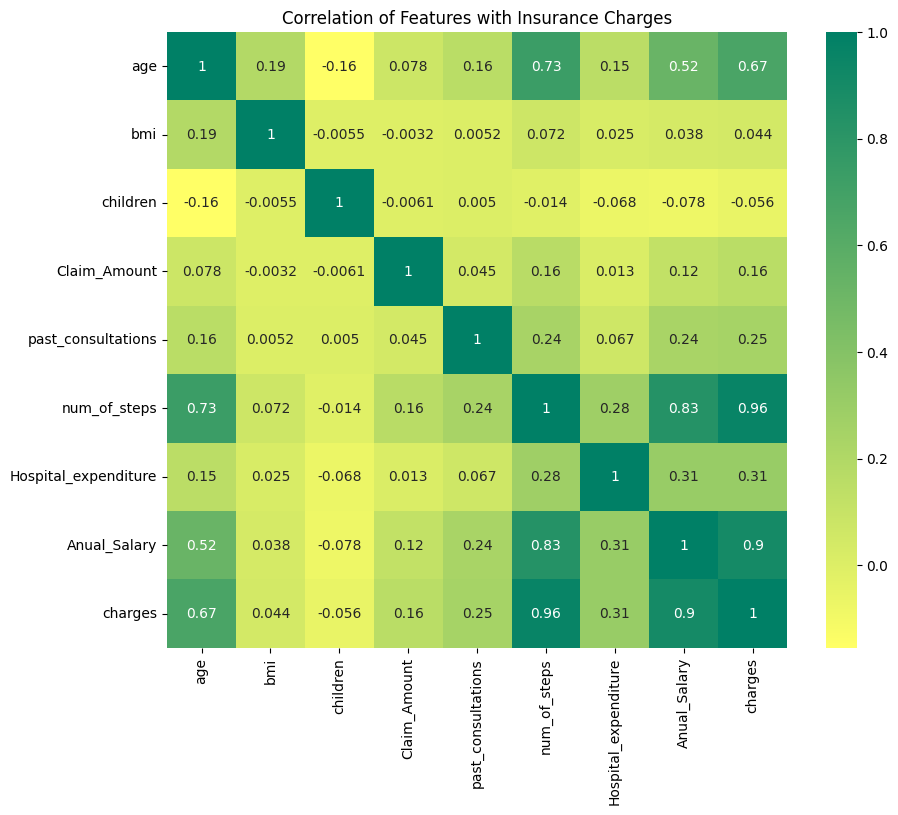

In [ ]:
#7. Which features most strongly influence insurance charges?

corr = df.corr(numeric_only=True)

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap = 'summer_r')

plt.title("Correlation of Features with Insurance Charges")
plt.show()

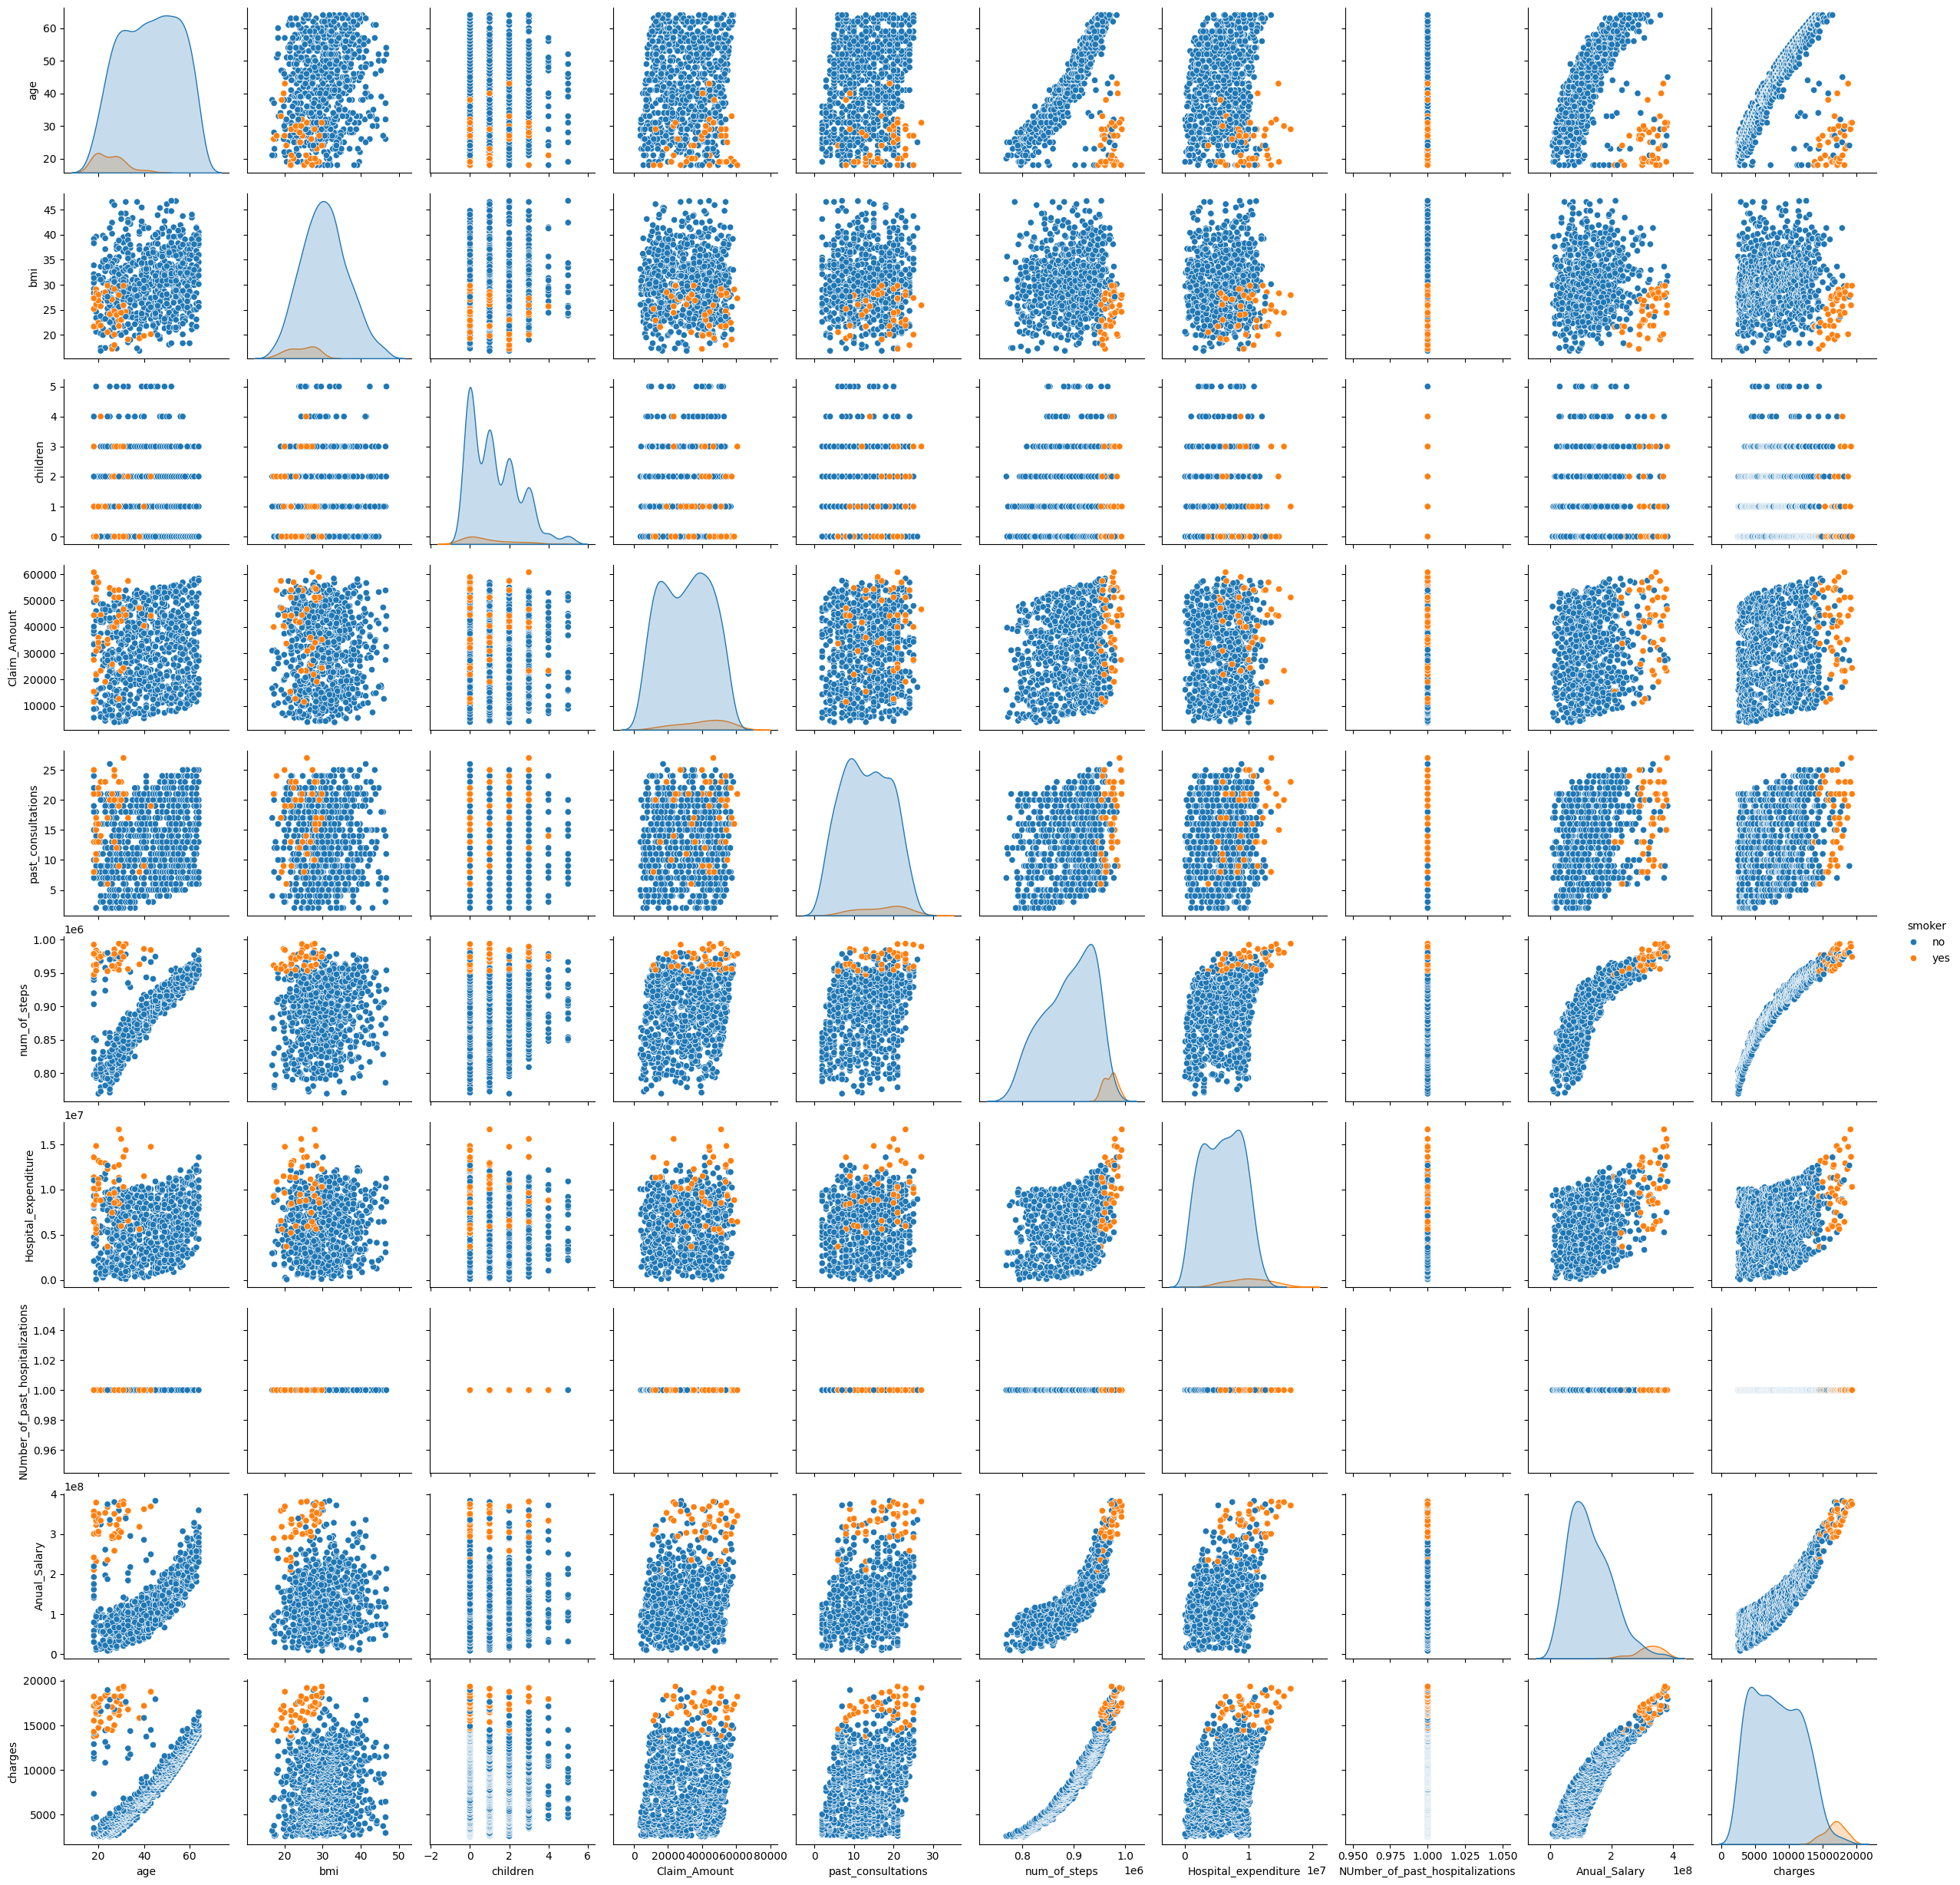

In [ ]:
#8. Now we can plot all columns of our dataset in a pairplot!
sns.pairplot(df, hue  = 'smoker')

**Conclusion**

From my analysis of the insurance dataset, I observed that age and smoking habits are the most influential factors affecting insurance charges and claim amounts. Smokers consistently incur significantly higher charges compared to non-smokers across all age groups. I also found that past consultations and hospital expenditure have only a moderate impact, suggesting that while medical history contributes to costs, it is not the strongest driver.